In [1]:
import sqlite3
import pandas as pd
import matplotlib.dates as dates
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, PercentFormatter

In [2]:
conn = sqlite3.connect('../data/netflix-data-aggregated.db')
v4 = pd.read_sql_query('select * from success_rate_v4', con=conn, parse_dates=['dtime'])
v6 = pd.read_sql_query('select * from success_rate_v6', con=conn, parse_dates=['dtime'])
conn.close()

In [3]:
v4

,unit_id,dtime,successes,failures,total,success_rate
0,62712.0,2016-07-22,21.0,0.0,21.0,1.00
1,62712.0,2016-07-23,21.0,0.0,21.0,1.00
2,62712.0,2016-07-24,23.0,0.0,23.0,1.00
3,62712.0,2016-07-25,22.0,0.0,22.0,1.00
4,62712.0,2016-07-26,23.0,0.0,23.0,1.00
...,...,...,...,...,...,...
58374,950240.0,2017-08-08,17.0,0.0,17.0,1.00
58375,950240.0,2017-08-09,19.0,0.0,19.0,1.00
58376,950240.0,2017-08-10,17.0,0.0,17.0,1.00
58377,950240.0,2017-08-11,19.0,1.0,20.0,0.95


In [4]:
v6

,unit_id,dtime,successes,failures,total,success_rate
0,62712.0,2016-07-22,0.0,20.0,20.0,0.0
1,62712.0,2016-07-23,0.0,16.0,16.0,0.0
2,62712.0,2016-07-24,0.0,19.0,19.0,0.0
3,62712.0,2016-07-25,0.0,23.0,23.0,0.0
4,62712.0,2016-07-26,0.0,22.0,22.0,0.0
...,...,...,...,...,...,...
56371,950240.0,2017-08-08,17.0,0.0,17.0,1.0
56372,950240.0,2017-08-09,19.0,0.0,19.0,1.0
56373,950240.0,2017-08-10,17.0,0.0,17.0,1.0
56374,950240.0,2017-08-11,19.0,0.0,19.0,1.0


In [5]:
for df in [v4, v6]:
    df['year'] = df['dtime'].dt.year
    df['month'] = df['dtime'].dt.month

### Daily medians for each probe

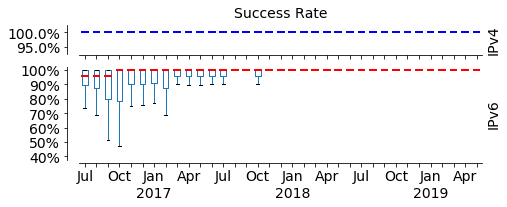

In [6]:
params = {'axes.labelsize' : 14, 'axes.titlesize' : 14,
          'font.size' : 14, 'legend.fontsize' : 14,
          'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
plt.rcParams.update(params)

ts_fig, (ts_ax_v4, ts_ax_v6) = plt.subplots(figsize = (7, 2.5), nrows=2, gridspec_kw={'height_ratios': [6, 19]})

info = [('IPv4', 'success_rate', ts_ax_v4, v4), 
        ('IPv6', 'success_rate', ts_ax_v6, v6)]

for (version, col, ts_ax, df) in info:
    bp = df.boxplot(column = [col], by = ['year', 'month'], ax = ts_ax, sym = "", 
                        medianprops = { 'linewidth' : 2.0 }, return_type = 'dict')

    color = 'gray'
    if version == 'IPv4':
        color = 'blue'
    elif version == 'IPv6':
        color = 'red'
    for key in bp.keys():
        for item in bp[key]['medians']:
            item.set_color(color)

    ts_fig.suptitle('')
    ts_ax.set_title('')
    ts_ax.set_xlabel('')
    
    ts_ax.set_ylabel('')
    if version=='IPv4':
        ts_ax.set_ylim([0.925, 1.025])
        ts_ax.set_yticks(np.arange(0.95, 1.04, 0.05))
        ts_ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
        
    else:
        ts_ax.set_ylim([0.375, 1.025])
        ts_ax.set_yticks(np.arange(0.4, 1.05, 0.1))
        ts_ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    

    major_ticklabels = ts_ax.xaxis.get_majorticklabels()
    for ticklabel in major_ticklabels:
        if version == 'IPv4':
            ticklabel.set_text('')
        else:
            label = ticklabel.get_text()[1:-1]
            try:
                y, m = label.split(', ')
            except:
                pass
            if m == "1":
                label = 'Jan\n%s' % y
            elif m == "10":
                label = 'Oct'
            elif m == "4":
                label = 'Apr'
            elif m == "7":
                label = 'Jul'
            else:
                label = ''
            ticklabel.set_text(label)
    
    ts_ax.grid(False)
    ts_ax.spines['right'].set_color('none')
    ts_ax.spines['top'].set_color('none')
    ts_ax.yaxis.set_ticks_position('left')
    ts_ax.xaxis.set_ticks_position('bottom')
    ts_ax.spines['bottom'].set_position(('axes', -0.03))
    ts_ax.spines['left'].set_position(('axes', -0.03))
    
    ts_ax.set_xticklabels(major_ticklabels, rotation = 0)

    ax1_ = ts_ax.twinx()
    ax1_.spines['right'].set_color('none')
    ax1_.spines['top'].set_color('none')
    ax1_.spines['left'].set_color('none')
    ax1_.spines['bottom'].set_color('none')
    ax1_.yaxis.set_ticks_position('none')
    ax1_.set_ylabel('%s' % version)
    plt.setp(ax1_.get_yticklabels(), visible = False)
    
ts_ax_v4.set_title('Success Rate', y=1.05)

ts_fig.savefig('../plots/success-rate.pdf', bbox_inches = 'tight')
    
plt.show()
plt.close('all')